In [1]:
import pandas as pd
import numpy as np

# Import clean data 
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)
df.shape

(201, 31)

In [2]:
#storing it as an CSV file
df.to_csv('module_5auto.csv')

In [3]:
#getting only numeric data , compare the column with the above result number of columns are reduced

df=df._get_numeric_data()
df.head(2)

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1


In [4]:
! pip install ipywidgets

In [5]:
#Vizulation libary
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<h2>Functions for plotting</h2>

In [6]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [7]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height   = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

<h1 id="ref1">Part 1: Training and Testing</h1>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y</b>:</p>

In [8]:
ydata = df['price']

In [9]:
xdata=df.drop('price',axis=1) # dropping the column price

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.15, random_state=1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the data set such that 40% of the data samples will be utilized for testing, set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train_1" , "x_test_1", "y_train_1" and  "y_test_1".</b>
</div>

In [11]:
x_train_1, x_test_1, y_train_1, y_test_1 =train_test_split(xdata, ydata, test_size=0.4, random_state=0)
print("Test Data: " , x_test_1.shape[0])
print("Test Data: " , x_train_1.shape[0])

Test Data:  81
Test Data:  120


In [12]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()

we fit the model using the feature horsepower 

In [13]:
lm.fit(x_train[['horsepower']],y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Let's Calculate the R^2 on the test data and train data:

In [14]:
lm.score(x_test[['horsepower']],y_test)

0.707688374146705

In [15]:
lm.score(x_train[['horsepower']],y_train)

0.6449517437659684

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 90% of the data for training data
</b>
</div>

In [16]:
x_train_2, x_test_2, y_train_2, y_test_2 =train_test_split(xdata, ydata, test_size=0.1, random_state=0)
print("Test Data: " , x_test_2.shape[0])
print("Train Data: " , x_train_2.shape[0])

Test Data:  21
Train Data:  180


In [17]:
lm.score(x_test_2[['horsepower']],y_test_2)

0.7408904462202237

<h2>Cross-validation Score</h2>

Lets import <b>model_selection</b> from the module <b>cross_val_score</b>.

In [18]:
from sklearn.model_selection import cross_val_score

We input the object, the feature in this case ' horsepower', the target data (y_data). The parameter 'cv'  determines the number of folds; in this case 4. 

In [19]:
scores=cross_val_score(lm,xdata[['horsepower']], ydata, cv=4)

In [20]:
scores

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

The default scoring is R^2; each element in the array has the average  R^2 value in the fold:

In [21]:
print("The R2 value: " , scores.mean() , "The standard Deviation: ", scores.std())

The R2 value:  0.522009915042119 The standard Deviation:  0.291183944475603


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.

In [22]:
-1 * cross_val_score(lm,xdata[['horsepower']], ydata,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, find the average R^2 for the second fold utilizing the horsepower as a feature : 
</b>
</div>

In [23]:
scores1=cross_val_score(lm,xdata[['horsepower']], ydata, cv=2)
print("The average : " , scores1.mean())

The average :  0.5166761697127429


You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function:

We input the object, the feature in this case <b>'horsepower'</b> , the target data <b>y_data</b>. The parameter 'cv' determines the number of folds; in this case 4. We can produce an output:

In [24]:
from sklearn.model_selection import cross_val_predict

In [25]:
yhat1=cross_val_predict(lm,xdata[['horsepower']], ydata, cv=4)
yhat1[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

<h1 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h1>

<p>It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world.  One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>

Let's create Multiple linear regression objects and train the model using <b>'horsepower'</b>, <b>'curb-weight'</b>, <b>'engine-size'</b> and <b>'highway-mpg'</b> as features.

In [26]:
lm= LinearRegression()
lm.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Prediction using training data:

In [27]:
yhattrain=lm.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhattrain[0:3]

array([11927.70699817, 11236.71672034,  6436.91775515])

Prediction using test data: 

In [28]:
lm.fit(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [29]:
yhattest=lm.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhattest[0:4]

array([10610.76123923,  5566.61351193, 10660.8261811 ,  5821.37135262])

Let's perform some model evaluation using our training and testing data separately. First  we import the seaborn and matplotlibb library for plotting.

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

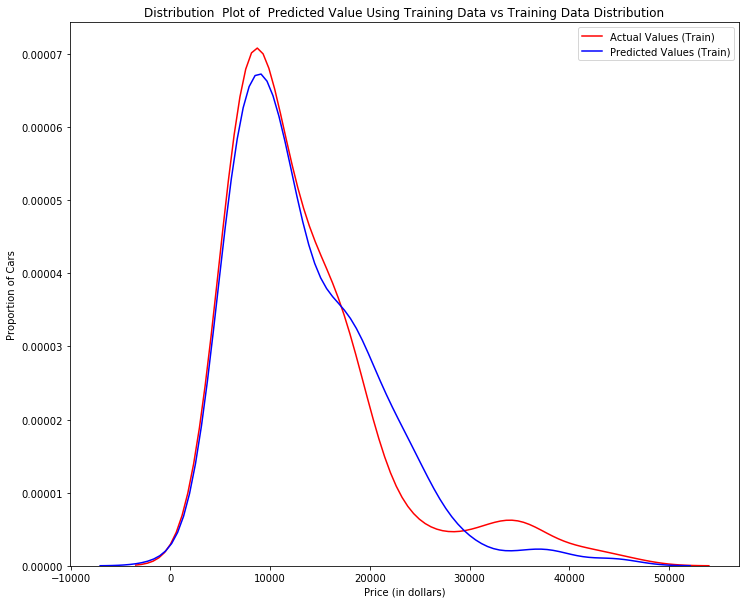

In [31]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhattrain, "Actual Values (Train)", "Predicted Values (Train)", Title)

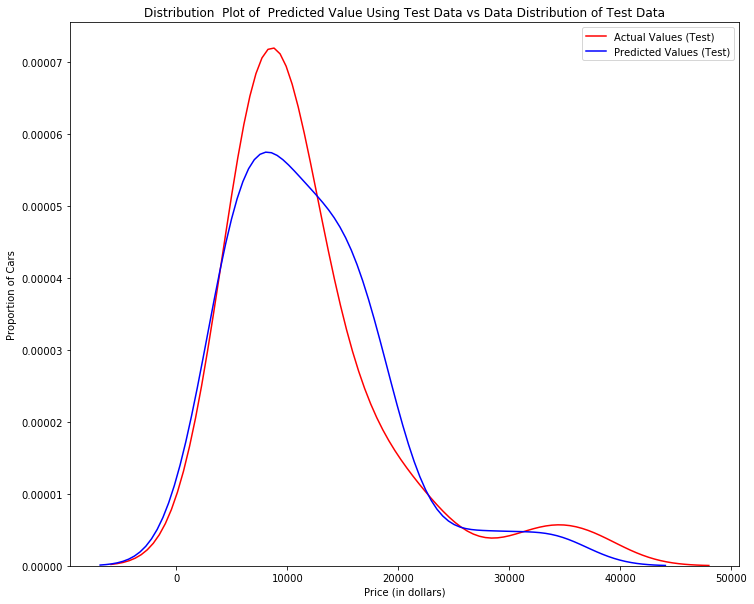

In [32]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhattest,"Actual Values (Test)","Predicted Values (Test)",Title)

<p>Comparing Figure 1 and Figure 2; it is evident the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15 000. This is where the distribution shape is exceptionally different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>

In [33]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>
Let's use 55 percent of the data for testing and the rest for training:

In [34]:
x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.55, random_state=0)

In [35]:
pr = PolynomialFeatures(degree=5)
x_trainpr = pr.fit_transform(x_train[['horsepower']])
x_testpr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [36]:
poly = LinearRegression()
poly.fit(x_trainpr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
yhatpoly=poly.predict(x_trainpr)
yhatpoly[0:3]

array([ 6109.23329137,  6109.23329137, 14143.18068394])

In [38]:
print("Predicted values:", yhatpoly[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6109.23329137  6109.23329137 14143.18068394 14316.03356325]
True values: [ 6295. 10698. 13860. 13499.]


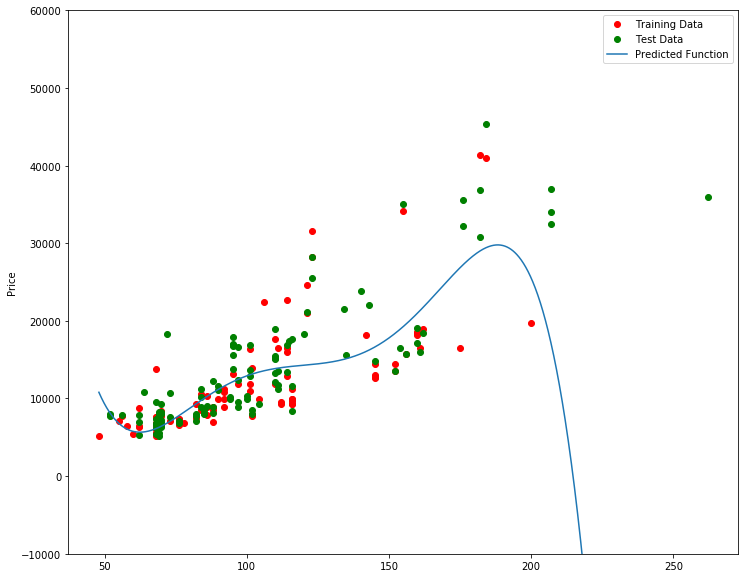

In [39]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Figur 4 A polynomial regression model, red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points

 R^2 of the training data:

In [40]:
poly.score(x_trainpr, y_train)

0.5682646621503102

In [41]:
poly.score(x_testpr, y_test) # - r2 is a sign of overfitting

-38.235733599697376

Let's see how the R^2 changes on the test data for different order polynomials and plot the results

Text(3, 0.75, 'Maximum R^2 ')

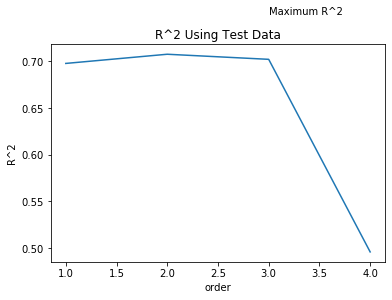

In [42]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_trainpr = pr.fit_transform(x_train[['horsepower']])
    
    x_testpr = pr.fit_transform(x_test[['horsepower']])    
    
    lm.fit(x_trainpr, y_train)
    
    Rsqu_test.append(lm.score(x_testpr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [43]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(xdata, ydata, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_trainpr = pr.fit_transform(x_train[['horsepower']])
    x_testpr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_trainpr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [44]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two?</b>
</div>

In [45]:
pr1=PolynomialFeatures(degree=2)

In [47]:
x_trainpr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_testpr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

Create a linear regression model "poly1" and train the object using the method "fit" using the polynomial features?

In [48]:
poly1=LinearRegression()
poly1.fit(x_trainpr1,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot"  to display the distribution of the predicted output vs the test data?</b>
</div>

In [50]:
yhatpoly1=poly1.predict(x_trainpr1)


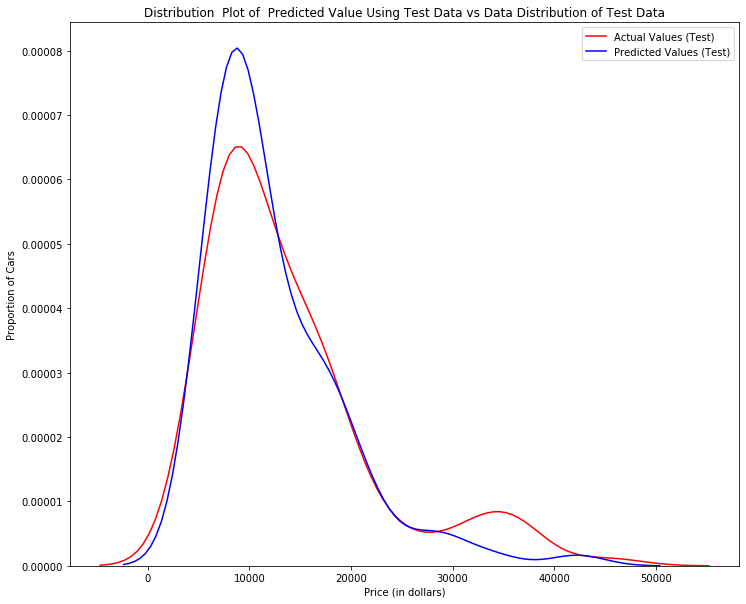

In [51]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhatpoly1,"Actual Values (Test)","Predicted Values (Test)",Title)

In [52]:
x_trainpr1.shape

(90, 15)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Use the distribution plot to determine the two regions were the predicted prices are less accurate than the actual prices.</b>
</div>

<h2 id="ref3">Part 3: Ridge regression</h2> 

In [54]:
pr=PolynomialFeatures(degree=2)
x_trainridge=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_testridge=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [55]:
from sklearn.linear_model import Ridge

In [56]:
ridgemodel=Ridge(alpha=0.1)

In [57]:
ridgemodel.fit(x_trainridge,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [59]:
yhatridge=ridgemodel.predict(x_trainridge)

In [60]:
print('predicted:', yhatridge[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 5993.39875099  5921.67712007  9362.88200666 18573.69116076]
test set : [ 6295. 10698. 13860. 13499.]


In [61]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_trainridge, y_train)
    Rsqu_test.append(RigeModel.score(x_testridge, y_test))
    Rsqu_train.append(RigeModel.score(x_trainridge, y_train))

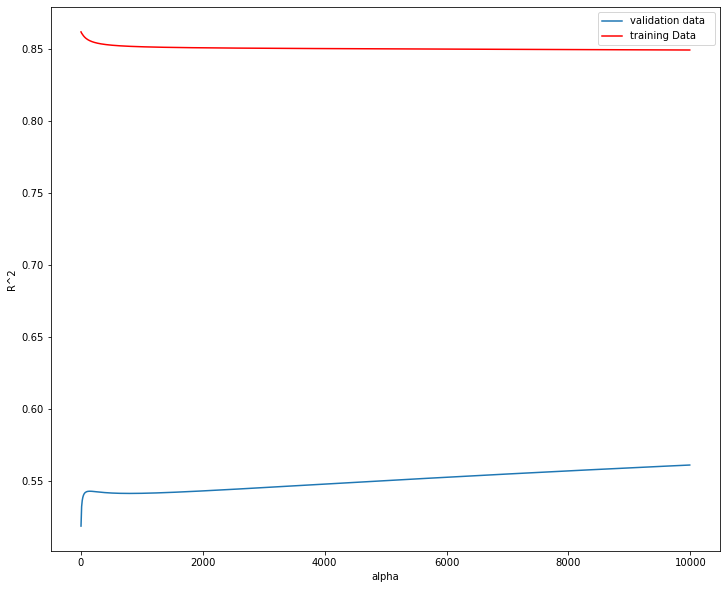

In [62]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [63]:
from sklearn.linear_model import Ridge

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression and calculate the R^2 using the polynomial features, use the training data to train the model and test data to test the model. The parameter alpha should be set to  10.
</div>

In [66]:
Ridgemodel=Ridge(alpha=10)
Ridgemodel.fit(x_trainridge,y_train)


Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
Ridgemodel.score(x_trainridge,y_train)

0.8609040479786999

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [70]:
RR=Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [74]:
Grid1.fit(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ydata)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [75]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [77]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8387851308772891

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #6): </h1>
Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters
</div>

In [89]:
Grid2 = GridSearchCV(RR, parameters1,cv=4)
Grid2.fit(xdata[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], ydata)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [88]:
BestRR=Grid2.best_estimator_
BestRR

Ridge(alpha=1000, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)